In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt


from IPython.display import display

# Part 1

In [2]:
# from WDI. Units trillions of 2010 USD
url = "https://datascience.quantecon.org/assets/data/wdi_data.csv"
wdi = pd.read_csv(url).set_index(["country", "year"])
wdi2017 = wdi.xs(2017, level="year")
wdi.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 72 entries, ('Canada', 2017) to ('United States', 2000)
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GovExpend    72 non-null     float64
 1   Consumption  72 non-null     float64
 2   Exports      72 non-null     float64
 3   Imports      72 non-null     float64
 4   GDP          72 non-null     float64
dtypes: float64(5)
memory usage: 3.9+ KB


In [3]:
# Data from https://www.nationmaster.com/country-info/stats/Geography/Land-area/Square-miles
# units -- millions of square miles
sq_miles = pd.Series({
   "United States": 3.8,
   "Canada": 3.8,
   "Germany": 0.137,
   "United Kingdom": 0.0936,
   "Russia": 6.6,
}, name="sq_miles").to_frame()
sq_miles.index.name = "country"
sq_miles

,sq_miles
country,
United States,3.8000
Canada,3.8000
Germany,0.1370
United Kingdom,0.0936
Russia,6.6000


In [4]:
# from WDI. Units millions of people
pop_url = "https://datascience.quantecon.org/assets/data/wdi_population.csv"
pop = pd.read_csv(pop_url).set_index(["country"])
pop.info()
pop.head(5)

<class 'pandas.core.frame.DataFrame'>
Index: 72 entries, Canada to United States
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        72 non-null     int64  
 1   Population  72 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.7+ KB


,year,Population
country,,
Canada,2017,36.540268
Canada,2016,36.109487
Canada,2015,35.702908
Canada,2014,35.437435
Canada,2013,35.082954


## Exercise 1
Use your new merge skills to answer the final question from above: What is the population density of each country? How much does it change over time?

In [5]:
# Merge populations and countries data frames
populations_merged = pd.merge(pop, sq_miles, on='country')

# Calculate population density
populations_merged['Population Density'] = populations_merged['Population'] / populations_merged['sq_miles']

# Group by country name and year and calculate the average population density
populations_density = populations_merged.groupby(['country', 'year'])['Population Density'].mean()

# Print the result
populations_density[36::]

country         year
United Kingdom  2000    629.193526
                2001    631.620438
                2002    634.299989
                2003    637.260438
                2004    640.896421
                2005    645.312030
                2006    650.072863
                2007    655.154519
                2008    660.331143
                2009    665.344765
                2010    670.580823
                2011    675.843141
                2012    680.558761
                2013    685.130620
                2014    690.311538
                2015    695.821165
                2016    700.807318
                2017    705.757041
United States   2000     74.253266
                2001     74.991830
                2002     75.690840
                2003     76.344193
                2004     77.054026
                2005     77.767526
                2006     78.521029
                2007     79.271370
                2008     80.024728
                2009     80.729350

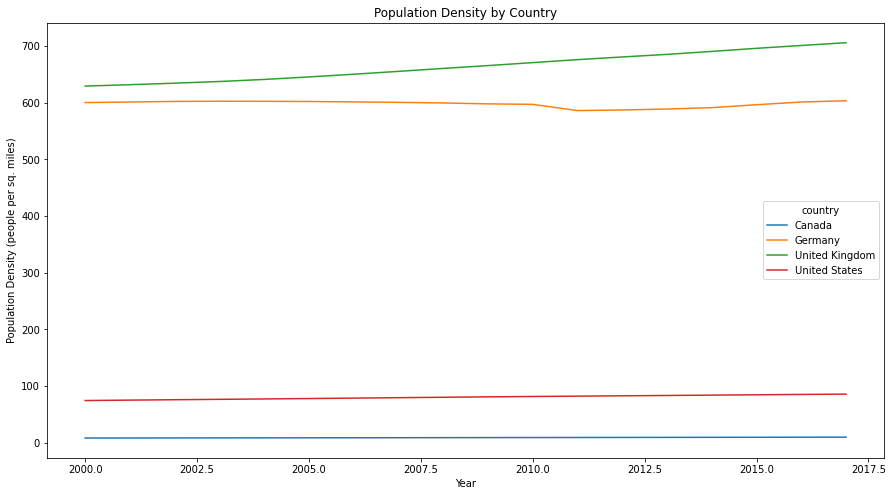

In [6]:
populations_density.unstack(level=0).plot(figsize=(15,8))
# Set plot title and axis labels
plt.title('Population Density by Country')
plt.xlabel('Year')
plt.ylabel('Population Density (people per sq. miles)')

# Show the plot
plt.show()

* As you can observe the above graph, the population density of canada have had an unsignificant increase [from 8.075192 to 9.615860].
* For the USA, we had a greater change [74.253266 to 85.565032]. 
* For the Germany, we had overall increase but also we had decrease during the period [ 600.084000 to 585.948781 and from that to 603.335781]. 
* And laslty for the UK, we had the most significant increase [629.193526 to 705.757041]!

## Exercise 2
Compare the how="left" with how="inner" options using the DataFrames wdi2017_no_US and sq_miles_no_germany.

Are the different? How?

Will this happen for all pairs of DataFrames, or are wdi2017_no_US and sq_miles_no_germany special in some way?

Also compare how="right" and how="outer" and answer the same questions.



In [7]:
wdi2017 = wdi.xs(2017, level="year")
wdi2017_no_US = wdi2017.drop("United States")
wdi2017_no_US

,GovExpend,Consumption,Exports,Imports,GDP
country,,,,,
Canada,0.372665,1.095475,0.582831,0.600031,1.868164
Germany,0.745579,2.112009,1.930563,1.666348,3.883870
United Kingdom,0.549538,1.809154,0.862629,0.933145,2.818704


In [8]:
sq_miles_no_germany = sq_miles.drop("Germany")
sq_miles_no_germany

,sq_miles
country,
United States,3.8000
Canada,3.8000
United Kingdom,0.0936
Russia,6.6000


First, let's clarify what the how parameter does in pd.merge(). The how parameter determines how to handle the overlapping columns in the merged data frame. There are four options:

how="left": Use only keys from left frame, similar to a SQL left outer join.
how="right": Use only keys from right frame, similar to a SQL right outer join.
how="inner": Use intersection of keys from both frames, similar to a SQL inner join.
how="outer": Use union of keys from both frames, similar to a SQL full outer join.
Now, let's compare the results of merging the wdi2017_no_US and sq_miles_no_germany data frames with different values of how:

In [9]:
# your code here
# Merge data frames with how="left"
left_merged = pd.merge(wdi2017_no_US, sq_miles_no_germany, on="country", how="left")
print("Left merge:")
print(left_merged)

Left merge:
                GovExpend  Consumption   Exports   Imports       GDP  sq_miles
country                                                                       
Canada           0.372665     1.095475  0.582831  0.600031  1.868164    3.8000
Germany          0.745579     2.112009  1.930563  1.666348  3.883870       NaN
United Kingdom   0.549538     1.809154  0.862629  0.933145  2.818704    0.0936


The left_merged data frame will contain all the rows from the wdi2017_no_US data frame, and any matching rows from the sq_miles_no_germany data frame. For any rows in the wdi2017_no_US data frame that do not have a match in the sq_miles_no_germany data frame, the corresponding columns in the merged data frame will contain missing values (NaN).



In [10]:
# Merge data frames with how="inner"
inner_merged = pd.merge(wdi2017_no_US, sq_miles_no_germany, on="country", how="inner")
print("Inner merge:")
print(inner_merged)

Inner merge:
                GovExpend  Consumption   Exports   Imports       GDP  sq_miles
country                                                                       
Canada           0.372665     1.095475  0.582831  0.600031  1.868164    3.8000
United Kingdom   0.549538     1.809154  0.862629  0.933145  2.818704    0.0936


The inner_merged data frame will only contain the rows that have a matching key (i.e., Country name) in both data frames.

In [11]:
# Merge data frames with how="right"
right_merged = pd.merge(wdi2017_no_US, sq_miles_no_germany, on="country", how="right")
print("Right merge:")
print(right_merged)

Right merge:
                GovExpend  Consumption   Exports   Imports       GDP  sq_miles
country                                                                       
United States         NaN          NaN       NaN       NaN       NaN    3.8000
Canada           0.372665     1.095475  0.582831  0.600031  1.868164    3.8000
United Kingdom   0.549538     1.809154  0.862629  0.933145  2.818704    0.0936
Russia                NaN          NaN       NaN       NaN       NaN    6.6000


The right_merged data frame will contain all the rows from the sq_miles_no_germany data frame, and any matching rows from the wdi2017_no_US data frame. For any rows in the sq_miles_no_germany data frame that do not have a match in the wdi2017_no_US data frame, the corresponding columns in the merged data frame will contain missing values (NaN).

In [12]:
# Merge data frames with how="outer"
outer_merged = pd.merge(wdi2017_no_US, sq_miles_no_germany, on="country", how="outer")
print("Outer merge:")
print(outer_merged)

Outer merge:
                GovExpend  Consumption   Exports   Imports       GDP  sq_miles
country                                                                       
Canada           0.372665     1.095475  0.582831  0.600031  1.868164    3.8000
Germany          0.745579     2.112009  1.930563  1.666348  3.883870       NaN
United Kingdom   0.549538     1.809154  0.862629  0.933145  2.818704    0.0936
United States         NaN          NaN       NaN       NaN       NaN    3.8000
Russia                NaN          NaN       NaN       NaN       NaN    6.6000


The resulting outer_merged data frame will contain all the rows from both wdi2017_no_US and sq_miles_no_germany, and will fill in missing values (NaN) for any columns that do not have a match in the other data frame. The resulting data frame will have more rows than either wdi2017_no_US or sq_miles_no_germany, since all rows from both data frames will be included in the merged data frame.

## Exercise 3
Can you pick the correct argument for how such that pd.merge(wdi2017, sq_miles, how="left") is equal to pd.merge(sq_miles, wdi2017, how=XXX)?

Yes, to make pd.merge(wdi2017, sq_miles, how="left") equal to pd.merge(sq_miles, wdi2017, how=XXX), the appropriate argument for how would be "right".

The reason for this is that when we use how="left", the resulting merged data frame will have all the rows from the left data frame (wdi2017), and only the matching rows from the right data frame (sq_miles). When we reverse the order of the data frames and use how="right", we will get the same result, but with the rows from the right data frame (sq_miles) as the base, and the matching rows from the left data frame (wdi2017) merged in. This will give us the same resulting merged data frame, but with the rows in a different order.

In [14]:
# your code here
pd.merge(wdi2017, sq_miles,on="country", how="left")

,GovExpend,Consumption,Exports,Imports,GDP,sq_miles
country,,,,,,
Canada,0.372665,1.095475,0.582831,0.600031,1.868164,3.8000
Germany,0.745579,2.112009,1.930563,1.666348,3.883870,0.1370
United Kingdom,0.549538,1.809154,0.862629,0.933145,2.818704,0.0936
United States,2.405743,12.019266,2.287071,3.069954,17.348627,3.8000


In [15]:
pd.merge(sq_miles, wdi2017,on="country", how='right')

,sq_miles,GovExpend,Consumption,Exports,Imports,GDP
country,,,,,,
Canada,3.8000,0.372665,1.095475,0.582831,0.600031,1.868164
Germany,0.1370,0.745579,2.112009,1.930563,1.666348,3.883870
United Kingdom,0.0936,0.549538,1.809154,0.862629,0.933145,2.818704
United States,3.8000,2.405743,12.019266,2.287071,3.069954,17.348627


# Part 2


In [16]:
url = "https://datascience.quantecon.org/assets/data/goodreads_ratings.csv.zip"
ratings = pd.read_csv(url)
display(ratings.head())

,Unnamed: 0,user_id,book_id,rating
0,0,1,258,5
1,1,2,4081,4
2,2,2,260,5
3,3,2,9296,5
4,4,2,2318,3


In [17]:
url = "https://datascience.quantecon.org/assets/data/goodreads_books.csv"
books = pd.read_csv(url)
books = books[["book_id", "authors", "title"]]

books.head()

,book_id,authors,title
0,1,Suzanne Collins,"The Hunger Games (The Hunger Games, #1)"
1,2,"J.K. Rowling, Mary GrandPré",Harry Potter and the Sorcerer's Stone (Harry P...
2,3,Stephenie Meyer,"Twilight (Twilight, #1)"
3,4,Harper Lee,To Kill a Mockingbird
4,5,F. Scott Fitzgerald,The Great Gatsby


In [18]:
rated_books = pd.merge(ratings, books)


## Exercise 4
Repeat the analysis above to determine the average rating for the books with the least number ratings.

Is there a distinguishable difference in the average rating compared to the most rated books?

Did you recognize any of the books?



In [28]:
most_rated_books_id = rated_books["book_id"].value_counts().nlargest(15).index
most_rated_books = rated_books.loc[rated_books["book_id"].isin(most_rated_books_id), :]
list(most_rated_books["title"].unique())
most_rated = most_rated_books.pivot_table(values="rating", index="title")
ave_most_rated = most_rated['rating'].mean()
ave_most_rated

4.1690502091855555

In [29]:
least_rated_books_id = rated_books["book_id"].value_counts().nsmallest(15).index
least_rated_books = rated_books.loc[rated_books["book_id"].isin(least_rated_books_id), :]
list(least_rated_books["title"].unique())


['Travel Team',
 'How I Raised Myself from Failure to Success in Selling',
 "The Summer I Turned Pretty Trilogy: The Summer I Turned Pretty; It's Not Summer Without You; We'll Always Have Summer",
 'The Batman Chronicles, Vol. 1',
 "The King's Agent",
 'The Magic (The Secret, #3)',
 'Trouble in Mudbug (Ghost-in-Law, #1)',
 'Fifty Shades Duo: Fifty Shades Darker / Fifty Shades Freed (Fifty Shades, #2-3)',
 'The Lake (The Lake Trilogy #1)',
 'Diary ng Panget',
 'Hard as It Gets (Hard Ink, #1)',
 "Kindle Paperwhite User's Guide",
 "Kindle User's Guide",
 'Attack on Titan: No Regrets, Volume 01',
 'Manga Classics: Les Misérables']

In [ ]:
# Let’s use pivot_table to compute the average rating for each of these books.
least_rated = least_rated_books.pivot_table(values="rating", index="title")
least_rated

In [30]:
ave_least_rated = least_rated['rating'].mean()
ave_least_rated

3.870408264004484

To determine if the difference between the average rating of the least rated books and the most rated books is statistically significant, we can perform a hypothesis test.

A common test to compare the means of two groups is the two-sample t-test. This test assumes that the samples are independent and that the population variances are equal. The test compares the means of the two groups and provides a p-value, which is the probability of observing a difference as large or larger than the one observed, assuming the null hypothesis is true (i.e., the means are equal).
The ttest_ind() function takes two arrays of values (in this case, the average ratings for the least rated books and the most rated books) and returns a Ttest_indResult object containing the t-statistic and p-value.

If the p-value is less than a chosen significance level (such as 0.05), we reject the null hypothesis and conclude that there is a statistically significant difference between the two groups. If the p-value is greater than the significance level, we fail to reject the null hypothesis and conclude that there is not enough evidence to say that there is a significant difference between the two groups.

In [32]:
from scipy.stats import ttest_ind
result = ttest_ind(least_rated['rating'], most_rated['rating'])
print("p-value:", result.pvalue)


p-value: 0.01390642708058991


Since p-value is less than 0.05, we reject null hypothesis and conclude that the there is distinguishable difference!

# Part 3

In [33]:
dfL = pd.DataFrame(
    {"Key": ["A", "B", "A", "C"], "C1":[1, 2, 3, 4], "C2": [10, 20, 30, 40]},
    index=["L1", "L2", "L3", "L4"]
)[["Key", "C1", "C2"]]

print("This is dfL: ")
display(dfL)

dfR = pd.DataFrame(
    {"Key": ["A", "B", "C", "D"], "C3": [100, 200, 300, 400]},
    index=["R1", "R2", "R3", "R4"]
)[["Key", "C3"]]

print("This is dfR:")
display(dfR)

This is dfL: 


,Key,C1,C2
L1,A,1,10
L2,B,2,20
L3,A,3,30
L4,C,4,40


This is dfR:


,Key,C3
R1,A,100
R2,B,200
R3,C,300
R4,D,400


## Exercise 5
In writing, describe what the output looks like when you do pd.concat([dfL, dfR], axis=1) (see above and/or run the cell below).

Be sure to describe things like:

What are the columns? What about columns with the same name?

What is the index?

Do any NaNs get introduced? If so, where? Why?

In [34]:
pd.concat([dfL, dfR], axis=1)


,Key,C1,C2,Key,C3
L1,A,1.0,10.0,NaN,NaN
L2,B,2.0,20.0,NaN,NaN
L3,A,3.0,30.0,NaN,NaN
L4,C,4.0,40.0,NaN,NaN
R1,NaN,NaN,NaN,A,100.0
R2,NaN,NaN,NaN,B,200.0
R3,NaN,NaN,NaN,C,300.0
R4,NaN,NaN,NaN,D,400.0


Running the code pd.concat([dfL, dfR], axis=1) concatenates the two DataFrames dfL and dfR horizontally, i.e., it combines the columns of the two DataFrames. The resulting DataFrame will have all the columns from both dfL and dfR, and will be aligned based on the values in the "Key" column.

The columns in the resulting DataFrame will be "Key", "C1", "C2", and "C3". If a column name is common to both DataFrames (in this case, "Key"), the resulting DataFrame will have separate columns for each DataFrame, with the DataFrame name as a prefix. So the resulting DataFrame will have columns "Key_x" and "Key_y".

The index of the resulting DataFrame will be the index of the left DataFrame (dfL), since that DataFrame is specified first in the concat() function.

If there are missing values in the original DataFrames, NaNs will be introduced in the resulting DataFrame. In this case, the "C3" column in dfR has a value for "D", which is not present in dfL. As a result, the corresponding values in the "C1" and "C2" columns will be NaN in the resulting DataFrame. Similarly, the "C3" value for "D" in dfR will be NaN in the resulting DataFrame, since there is no matching key in dfL.

## Exercise 6
Determine what happens when you run each of the two cells below.

For each cell, answer the list of questions from the previous exercise.



In [35]:
# First code cell for above exercise
pd.concat([dfL, dfL], axis=0)

,Key,C1,C2
L1,A,1,10
L2,B,2,20
L3,A,3,30
L4,C,4,40
L1,A,1,10
L2,B,2,20
L3,A,3,30
L4,C,4,40


dfL with itself vertically, i.e., it combines the rows of the same DataFrame. The resulting DataFrame will have twice the number of rows as the original DataFrame.

The columns in the resulting DataFrame will be the same as in the original DataFrame, i.e., "Key", "C1", and "C2".

The index of the resulting DataFrame will be a new range index, with integers from 0 to 7 (assuming the original index was the default integer range index).

No NaNs will be introduced in the resulting DataFrame, since the original DataFrame did not have any missing values.

In [36]:
# Second code cell for above exercise
pd.concat([dfR, dfR], axis=1)

,Key,C3,Key,C3
R1,A,100,A,100
R2,B,200,B,200
R3,C,300,C,300
R4,D,400,D,400


The second code cell pd.concat([dfR, dfR], axis=1) concatenates the DataFrame dfR with itself horizontally. The resulting DataFrame will have all the columns from dfR, and will be aligned based on the index of the DataFrame.

The columns in the resulting DataFrame will be "Key" and "C3", and there will be two columns for each of these, with "_x" and "_y" suffixes to distinguish them.

The index of the resulting DataFrame will be the same as the index of the original DataFrame, i.e., "R1", "R2", "R3", and "R4".

No NaNs will be introduced in the resulting DataFrame, since the original DataFrame did not have any missing values.

## Exercise 7
Describe in words why the output of pd.merge(dfL, dfR, how="right") has more rows than either dfL or dfR.

Run the cell below to see the output of that operation.



In [37]:
pd.merge(dfL, dfR, how="right")

,Key,C1,C2,C3
0,A,1.0,10.0,100
1,A,3.0,30.0,100
2,B,2.0,20.0,200
3,C,4.0,40.0,300
4,D,NaN,NaN,400


The output of pd.merge(dfL, dfR, how="right") has more rows than either dfL or dfR because it is a right join, which means that it includes all the rows from the right DataFrame (dfR), and only the matching rows from the left DataFrame (dfL).

In other words, if there are rows in dfR that do not have a matching key in dfL, those rows will still be included in the resulting DataFrame, and will have NaN values in the columns from dfL.

So, if dfR has more unique keys than dfL, the resulting DataFrame will have more rows than either of the original DataFrames.

This is in contrast to a left join (specified by how="left"), where all the rows from the left DataFrame are included, and only the matching rows from the right DataFrame are included.